<a href="https://colab.research.google.com/github/xuover/portfolioqb_public/blob/master/portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This program attempts to optimize a users portfolio using the Efficient Frontier
# credit "Computer Science" YouTube channel

In [0]:
# Import Python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [0]:
# Get the tickers in the portfolio
holdings = ["GOOGL", "AAPL", "TWTR", "NKE", "GLD", "BP", "BIDU"]

In [0]:
# Assign weights to stocks
weights = np.array([0.45, 0.22, 0.1, 0.12, 0.07, 0.02, 0.02])

In [0]:
# Set the holdings start date
stockStartDate = '2015-01-01'

In [0]:
# Set the holdings current date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-03-19'

In [0]:
# Create a dataframe to store the adjusted close price of the holdings
df = pd.DataFrame()

# Store the 'Adj Close' price of the stock in the df
for stock in holdings:
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

In [0]:
# Show the df
df

,GOOGL,AAPL,TWTR,NKE,GLD,BP,BIDU
Date,,,,,,,
2015-01-02,529.549988,100.216454,36.560001,44.143959,114.080002,27.209009,223.080002
2015-01-05,519.460022,97.393181,36.380001,43.433231,115.800003,25.767183,219.789993
2015-01-06,506.640015,97.402374,38.759998,43.177742,117.120003,25.574469,220.179993
2015-01-07,505.149994,98.768150,37.279999,44.069637,116.430000,25.638706,224.350006
2015-01-08,506.910004,102.563072,39.090000,45.086948,115.940002,26.216864,229.210007
...,...,...,...,...,...,...,...
2020-03-13,1214.270020,277.970001,29.290001,75.580002,143.279999,22.170000,100.290001
2020-03-16,1073.000000,242.210007,24.040001,66.790001,141.639999,18.840000,89.680000
2020-03-17,1118.060059,252.860001,24.480000,69.839996,143.559998,18.840000,91.129997


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


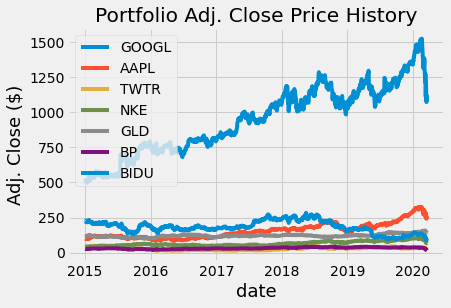

In [0]:
# Visually show the portfolio
title = "Portfolio Adj. Close Price History"

# Get the portfolio
my_portfolio = df

# Create and plot the graph
for c in my_portfolio.columns.values:
  plt.plot(my_portfolio[c], label = c)

plt.title(title)
plt.xlabel("date", fontsize = 18)
plt.ylabel("Adj. Close ($)", fontsize = 18)
plt.legend(my_portfolio.columns.values, loc = 'upper left')
plt.show()

In [0]:
# Show the daily simple return
returns = df.pct_change()
returns

,GOOGL,AAPL,TWTR,NKE,GLD,BP,BIDU
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.019054,-0.028172,-0.004923,-0.016100,0.015077,-0.052991,-0.014748
2015-01-06,-0.024679,0.000094,0.065420,-0.005882,0.011399,-0.007479,0.001774
2015-01-07,-0.002941,0.014022,-0.038184,0.020656,-0.005891,0.002512,0.018939
2015-01-08,0.003484,0.038423,0.048552,0.023084,-0.004209,0.022550,0.021663
...,...,...,...,...,...,...,...
2020-03-12,-0.082046,-0.098755,-0.144409,-0.116667,-0.039888,-0.125304,-0.085450
2020-03-13,0.092411,0.119808,0.093727,0.018598,-0.030516,0.027816,0.013030
2020-03-16,-0.116342,-0.128647,-0.179242,-0.116301,-0.011446,-0.150203,-0.105793


In [0]:
# Create and show annualized covariance matrix.  Assumes 252 trading days/year.  
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,GOOGL,AAPL,TWTR,NKE,GLD,BP,BIDU
GOOGL,0.065478,0.041949,0.049596,0.029767,-0.003312,0.025744,0.041627
AAPL,0.041949,0.075928,0.050020,0.031130,-0.004173,0.031926,0.042146
TWTR,0.049596,0.050020,0.274295,0.033096,-0.002628,0.039686,0.047979
NKE,0.029767,0.031130,0.033096,0.063354,-0.003410,0.024224,0.031907
GLD,-0.003312,-0.004173,-0.002628,-0.003410,0.016788,0.001749,-0.001969
BP,0.025744,0.031926,0.039686,0.024224,0.001749,0.074591,0.034615
BIDU,0.041627,0.042146,0.047979,0.031907,-0.001969,0.034615,0.126946


In [0]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.04345585773731709

In [0]:
# Calculate portfolio volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.2084606863111534

In [0]:
# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.14142596547977626

In [0]:
# Show the expected annual return, volatilty, and variance

percent_var = str(round(port_variance, 2) * 100) + "%"
percent_vols = str(round(port_volatility, 2) * 100) + "%"
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + "%"

print("Expected annual return: "+ percent_ret)
print("Annual volatility: "+ percent_vols)
print("Annual variance: "+ percent_var)

Expected annual return: 14.000000000000002%
Annual volatility: 21.0%
Annual variance: 4.0%


In [0]:
# Install a python library that specializes in portfolio optimization calcs
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.8MB/s 


In [0]:
# Import pypfopt librairies

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [0]:
# Portfolio Optimization

# Calculate expected returns and the annualized covariance matrix of portfolio
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


{'GOOGL': 0.19457, 'AAPL': 0.35044, 'TWTR': 0.0, 'NKE': 0.02345, 'GLD': 0.43154, 'BP': 0.0, 'BIDU': 0.0}
Expected annual return: 13.1%
Annual volatility: 14.0%
Sharpe Ratio: 0.79


(0.13123547479434608, 0.13993233152024828, 0.7949233289109475)

In [0]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 120000)

allocation , leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'GOOGL': 21.0, 'AAPL': 171.0, 'NKE': 42.0, 'GLD': 369.0}
Funds remaining: $128.46
